In [18]:
!pip install pandas
!pip install seaborn
!pip install nltk
import pandas as pd 
import numpy as np
import random
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
np.random.seed(0)
random.seed(0)


[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
# loading dataset
df = pd.read_csv('McDonald_s_Reviews.csv', encoding='latin-1')
df.head(20)

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4 stars
2,3,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,Made a mobile order got to the speaker and che...,1 star
3,4,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5 stars
4,5,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,"I repeat my order 3 times in the drive thru, a...",1 star
5,6,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 weeks ago,I work for door dash and they locked us all ou...,1 star
6,7,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,If I could give this location a zero on custo...,1 star
7,8,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a year ago,Came in and ordered a Large coffee w/no ice. T...,1 star
8,9,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Went thru drive thru. Ordered. Getting home no...,1 star
9,10,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,"I'm not really a huge fan of fast food, but I ...",4 stars


<Axes: xlabel='rating', ylabel='count'>

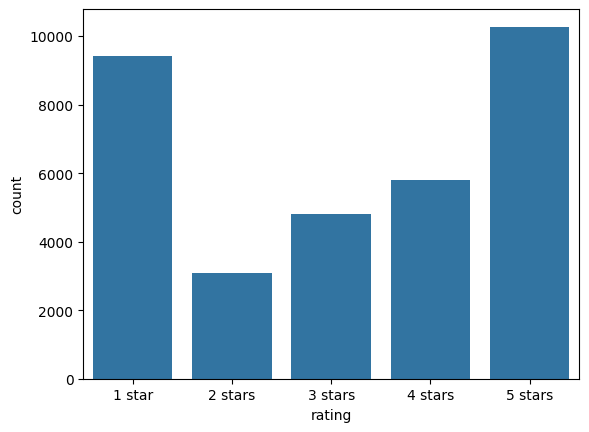

In [20]:
# count of ratings 
sns.countplot(data=df, x=df.rating, order=['1 star', '2 stars', '3 stars', '4 stars', '5 stars'])

In [21]:
df.isnull().sum()
df.duplicated().sum()


0

In [22]:
# convert rating to an int 
rating_map = {"1 star": 1,
              "2 stars": 2, 
              "3 stars": 3, 
              "4 stars": 4,
              "5 stars": 5
             }

df['rating'] = df['rating'].map(rating_map)
df.head(5)

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4
2,3,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,Made a mobile order got to the speaker and che...,1
3,4,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5
4,5,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,"I repeat my order 3 times in the drive thru, a...",1


In [23]:
df = pd.read_csv('McDonald_s_Reviews.csv',encoding = 'latin-1')
df = df.head(1000) #using the first 1000 records
example = df['review'][0] #defining example variable used to test sentiment analysis models
print(example)

Why does it look like someone spit on my food?
I had a normal transaction,  everyone was chill and polite, but now i dont want to eat this. Im trying not to think about what this milky white/clear substance is all over my food, i d*** sure am not coming back.


In [24]:
nltk.download('punkt')
tokens = nltk.word_tokenize(example)
tokens[:10]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\julia\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['Why', 'does', 'it', 'look', 'like', 'someone', 'spit', 'on', 'my', 'food']

In [25]:
nltk.download('averaged_perceptron_tagger')
tagged = nltk.pos_tag(tokens)
tagged[:10]

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\julia\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('Why', 'WRB'),
 ('does', 'VBZ'),
 ('it', 'PRP'),
 ('look', 'VB'),
 ('like', 'IN'),
 ('someone', 'NN'),
 ('spit', 'NN'),
 ('on', 'IN'),
 ('my', 'PRP$'),
 ('food', 'NN')]

In [26]:
nltk.download('maxent_ne_chunker')
nltk.download('words')
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  Why/WRB
  does/VBZ
  it/PRP
  look/VB
  like/IN
  someone/NN
  spit/NN
  on/IN
  my/PRP$
  food/NN
  ?/.
  I/PRP
  had/VBD
  a/DT
  normal/JJ
  transaction/NN
  ,/,
  everyone/NN
  was/VBD
  chill/NN
  and/CC
  polite/NN
  ,/,
  but/CC
  now/RB
  i/VBP
  dont/VBP
  want/VBP
  to/TO
  eat/VB
  this/DT
  ./.
  Im/NNP
  trying/VBG
  not/RB
  to/TO
  think/VB
  about/IN
  what/WP
  this/DT
  milky/NN
  white/clear/JJ
  substance/NN
  is/VBZ
  all/DT
  over/IN
  my/PRP$
  food/NN
  ,/,
  i/NN
  d/VBP
  */JJ
  */NNP
  */NNP
  sure/JJ
  am/VBP
  not/RB
  coming/VBG
  back/RB
  ./.)

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\julia\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\julia\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [27]:
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\julia\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [30]:
!pip install --upgrade ipywidgets
!jupyter nbextension enable --py widgetsnbextension
!jupyter --version

from IPython.display import display
from ipywidgets import FloatProgress

res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    review = row['review']
    id = row['reviewer_id']
    res[id] = sia.polarity_scores(review)



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
usage: jupyter [-h] [--version] [--config-dir] [--data-dir] [--runtime-dir]
               [--paths] [--json] [--debug]
               [subcommand]

Jupyter: Interactive Computing

positional arguments:
  subcommand     the subcommand to launch

options:
  -h, --help     show this help message and exit
  --version      show the versions of core jupyter packages and exit
  --config-dir   show Jupyter config dir
  --data-dir     show Jupyter data dir
  --runtime-dir  show Jupyter runtime dir
  --paths        show all Jupyter paths. Add --json for machine-readable
                 format.
  --json         output paths as machine-readable json
  --debug        output debug information about paths

Available subcommands: dejavu events execute kernel kernelspec lab
labextension labhub migrate nbconvert run server troubleshoot trust

Jupyter command `jupyter-nbextension`

Selected Jupyter core packages...
IPython          : 8.14.0
ipykernel        : 6.25.1
ipywidgets       : 8.1.1
jupyter_client   : 8.3.0
jupyter_core     : 5.3.1
jupyter_server   : 2.7.2
jupyterlab       : 4.0.5
nbclient         : 0.8.0
nbconvert        : 7.7.4
nbformat         : 5.9.2
notebook         : not installed
qtconsole        : not installed
traitlets        : 5.9.0


ImportError: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

In [ ]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index':'reviewer_id'})
vaders = vaders.merge(df, how = 'left')

In [ ]:
vaders.head()

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating


In [ ]:
vaders_sorted = vaders.sort_values('rating')
%store vaders_sorted
ax = sns.barplot(data=vaders_sorted, x='rating', y='compound')
ax.set_title('Compound Score by McDonalds Star Reviews')
plt.show()

Stored 'vaders_sorted' (DataFrame)


ValueError: Could not interpret value `compound` for `y`. An entry with this name does not appear in `data`.

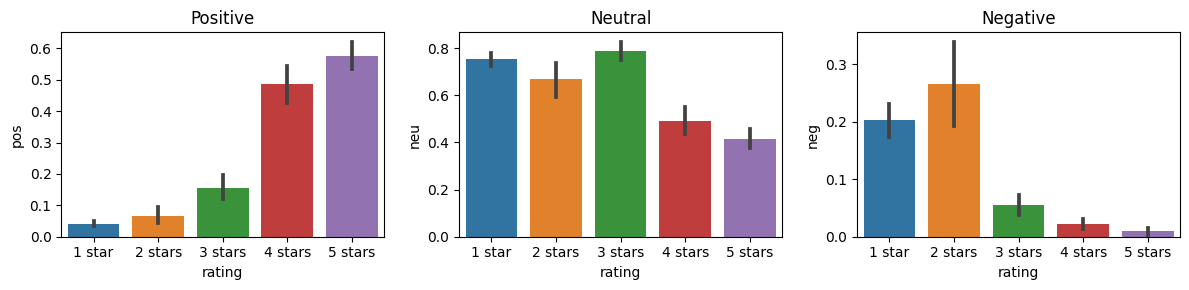

In [ ]:
fig, axs = plt.subplots(1,3,figsize=(12,3))
sns.barplot(data=vaders_sorted, x='rating',y='pos',ax=axs[0])
sns.barplot(data=vaders_sorted, x='rating',y='neu',ax=axs[1])
sns.barplot(data=vaders_sorted, x='rating',y='neg',ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score

# Load your McDonald's dataset
mcdonalds_data = pd.read_csv('McDonald_s_Reviews.csv', encoding='latin-1')

# convert rating to an int 
rating_map = {"1 star": 1,
              "2 stars": 2, 
              "3 stars": 3, 
              "4 stars": 4,
              "5 stars": 5
             }

mcdonalds_data['rating'] = mcdonalds_data['rating'].map(rating_map)

# Assuming 'review' and 'rating' are columns in the dataset
reviews = mcdonalds_data['review']
ratings = mcdonalds_data['rating']

# Define positive sentiment based on ratings
mcdonalds_data['sentiment'] = mcdonalds_data['rating'].apply(lambda x: 1 if x >= 4 else 0)

# Splitting the dataset into training and testing sets
train_reviews, test_reviews, train_sentiments, test_sentiments = train_test_split(reviews, mcdonalds_data['sentiment'], test_size=0.2, random_state=42)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
train_tfidf = tfidf_vectorizer.fit_transform(train_reviews)
test_tfidf = tfidf_vectorizer.transform(test_reviews)

# Sentiment Analysis Model (Logistic Regression)
sentiment_model = LogisticRegression()
sentiment_model.fit(train_tfidf, train_sentiments)

# Predictions
predictions = sentiment_model.predict(test_tfidf)

precision = precision_score(test_sentiments, predictions)
recall = recall_score(test_sentiments, predictions)
f1 = f1_score(test_sentiments, predictions)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Precision: 0.8725
Recall: 0.8152
F1 Score: 0.8429


c:\users\zuelz\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
